In [4]:
#importing necessary libraries.
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

building Algorithmes

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [6]:
#Data wrangling.
#loading the dataset
df = pd.read_csv('cardata.csv')
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
#Checking descriptive Statistics
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# convert year type from integer to string because the year is not quantitive data
df['Year']=df['Year'].astype('str')

In [10]:
# Checking for duplicated rows
df.duplicated().sum()

2

there are two duplicated rows.

In [11]:
#removing the duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(299, 9)

Duplicate rows have been dropped.

Performing Exploratory Data Analysis.

In [13]:
#Describing the Numeric columns
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478
std,4.984240,8.567887,39015.170352,0.248720
min,0.100000,0.320000,500.000000,0.000000
25%,0.850000,1.200000,15000.000000,0.000000
50%,3.510000,6.100000,32000.000000,0.000000
75%,6.000000,9.840000,48883.500000,0.000000
max,35.000000,92.600000,500000.000000,3.000000


In [14]:
#describing the string columns
df.describe(include='O')

,Car_Name,Year,Fuel_Type,Seller_Type,Transmission
count,299,299,299,299,299
unique,98,16,3,2,2
top,city,2015,Petrol,Dealer,Manual
freq,26,60,239,193,260


Checking possible losses in the price of cars

In [15]:
(df['Selling_Price']>df['Present_Price']).sum()

0

There isn't any loss in the price of the cars.

grouping each type of car and sorting it by the highest present price.

In [16]:
df.groupby(['Car_Name'])['Present_Price','Selling_Price'].mean().sort_values(by=['Selling_Price'],ascending=True).T

Car_Name,Bajaj Discover 125,Bajaj ct 100,Hero CBZ Xtreme,Hero Hunk,Hero Super Splendor,Hero Ignitor Disc,Honda CB twister,Honda CB Shine,Hero Glamour,Suzuki Access 125,TVS Wego,Bajaj Discover 100,Bajaj Pulsar 150,Hero Honda Passion Pro,Hero Splender Plus,Activa 3g,Honda Karizma,TVS Jupyter,Honda Activa 125,800,Hero Honda CBZ extreme,Honda CB Unicorn,Yamaha FZ S,Activa 4g,Bajaj Pulsar 135 LS,Honda CB Trigger,Hero Passion Pro,Hero Splender iSmart,Bajaj Avenger Street 220,Honda Activa 4G,TVS Apache RTR 180,Honda Dream Yuga,TVS Sport,Bajaj Pulsar NS 200,Yamaha Fazer,Hero Passion X pro,Bajaj Pulsar 220 F,Bajaj Avenger 220 dtsi,TVS Apache RTR 160,Yamaha FZ v 2.0,Bajaj Avenger 150 street,Bajaj Pulsar NS 200,Hero Extreme,Yamaha FZ S V 2.0,Honda CBR 150,Honda CB Hornet 160R,Yamaha FZ 16,Bajaj Avenger 150,Bajaj Avenger 220,Royal Enfield Classic 500,Royal Enfield Bullet 350,Bajaj Pulsar RS200,Royal Enfield Classic 350,Mahindra Mojo XT300,KTM 390 Duke,Royal Enfield Thunder 350,omni,Royal Enfield Thunder 500,KTM RC390,Hyosung GT250R,KTM RC200,Bajaj Dominar 400,corolla,UM Renegade Mojave,camry,wagon r,alto k10,alto 800,ritz,eon,i10,sx4,etios liva,amaze,etios g,dzire,swift,etios cross,brio,etios gd,i20,ignis,grand i10,xcent,jazz,baleno,verna,s cross,ertiga,corolla altis,city,ciaz,vitara brezza,elantra,creta,innova,fortuner,land cruiser
Present_Price,0.570,0.32,0.787,0.75,0.57,0.65,0.510,0.58,0.57,0.58,0.52,0.47,0.7475,0.51,0.48,0.53,1.05,0.52,0.57,2.28,0.787,0.72,0.83,0.51,0.64,0.73,0.550,0.540,0.95,0.510,0.826,0.54,0.52,0.990000,0.88,0.55,0.940,0.950,0.810000,0.84,0.8,0.99,0.787,0.840000,1.200,0.870000,0.82,0.80,0.95,1.750,1.17,1.26,1.470000,1.40,2.40,1.5000,2.69,1.9,2.37,3.45,1.780,1.60,12.35,1.82,23.73,4.4500,3.82,3.60,5.3375,4.43,4.566,8.066667,6.3675,6.785714,6.786667,7.6325,6.342,7.966667,6.044,7.85,7.205556,5.71,5.70000,7.130000,8.157143,7.87,9.400000,8.61,9.39,17.582500,11.791923,9.756667,9.83,14.79,13.6,17.846667,30.745,92.6
Selling_Price,0.175,0.18,0.200,0.20,0.20,0.20,0.205,0.21,0.25,0.25,0.25,0.27,0.3000,0.30,0.30,0.31,0.33,0.35,0.35,0.35,0.380,0.38,0.40,0.40,0.40,0.42,0.425,0.425,0.45,0.465,0.475,0.48,0.48,0.483333,0.50,0.50,0.515,0.525,0.556667,0.60,0.6,0.60,0.600,0.603333,0.625,0.716667,0.75,0.75,0.79,0.925,1.05,1.05,1.144286,1.15,1.15,1.1625,1.25,1.3,1.35,1.35,1.425,1.45,1.50,1.70,2.50,2.5125,2.57,2.85,2.8625,2.90,3.060,3.158333,3.7000,4.221429,4.266667,4.4750,4.540,4.633333,4.745,4.75,4.766667,4.90,4.94375,4.966667,5.828571,5.85,6.107857,6.50,6.58,7.183125,7.419231,7.472222,9.25,11.60,11.8,12.777778,18.254,35.0


Plotting a barplot.

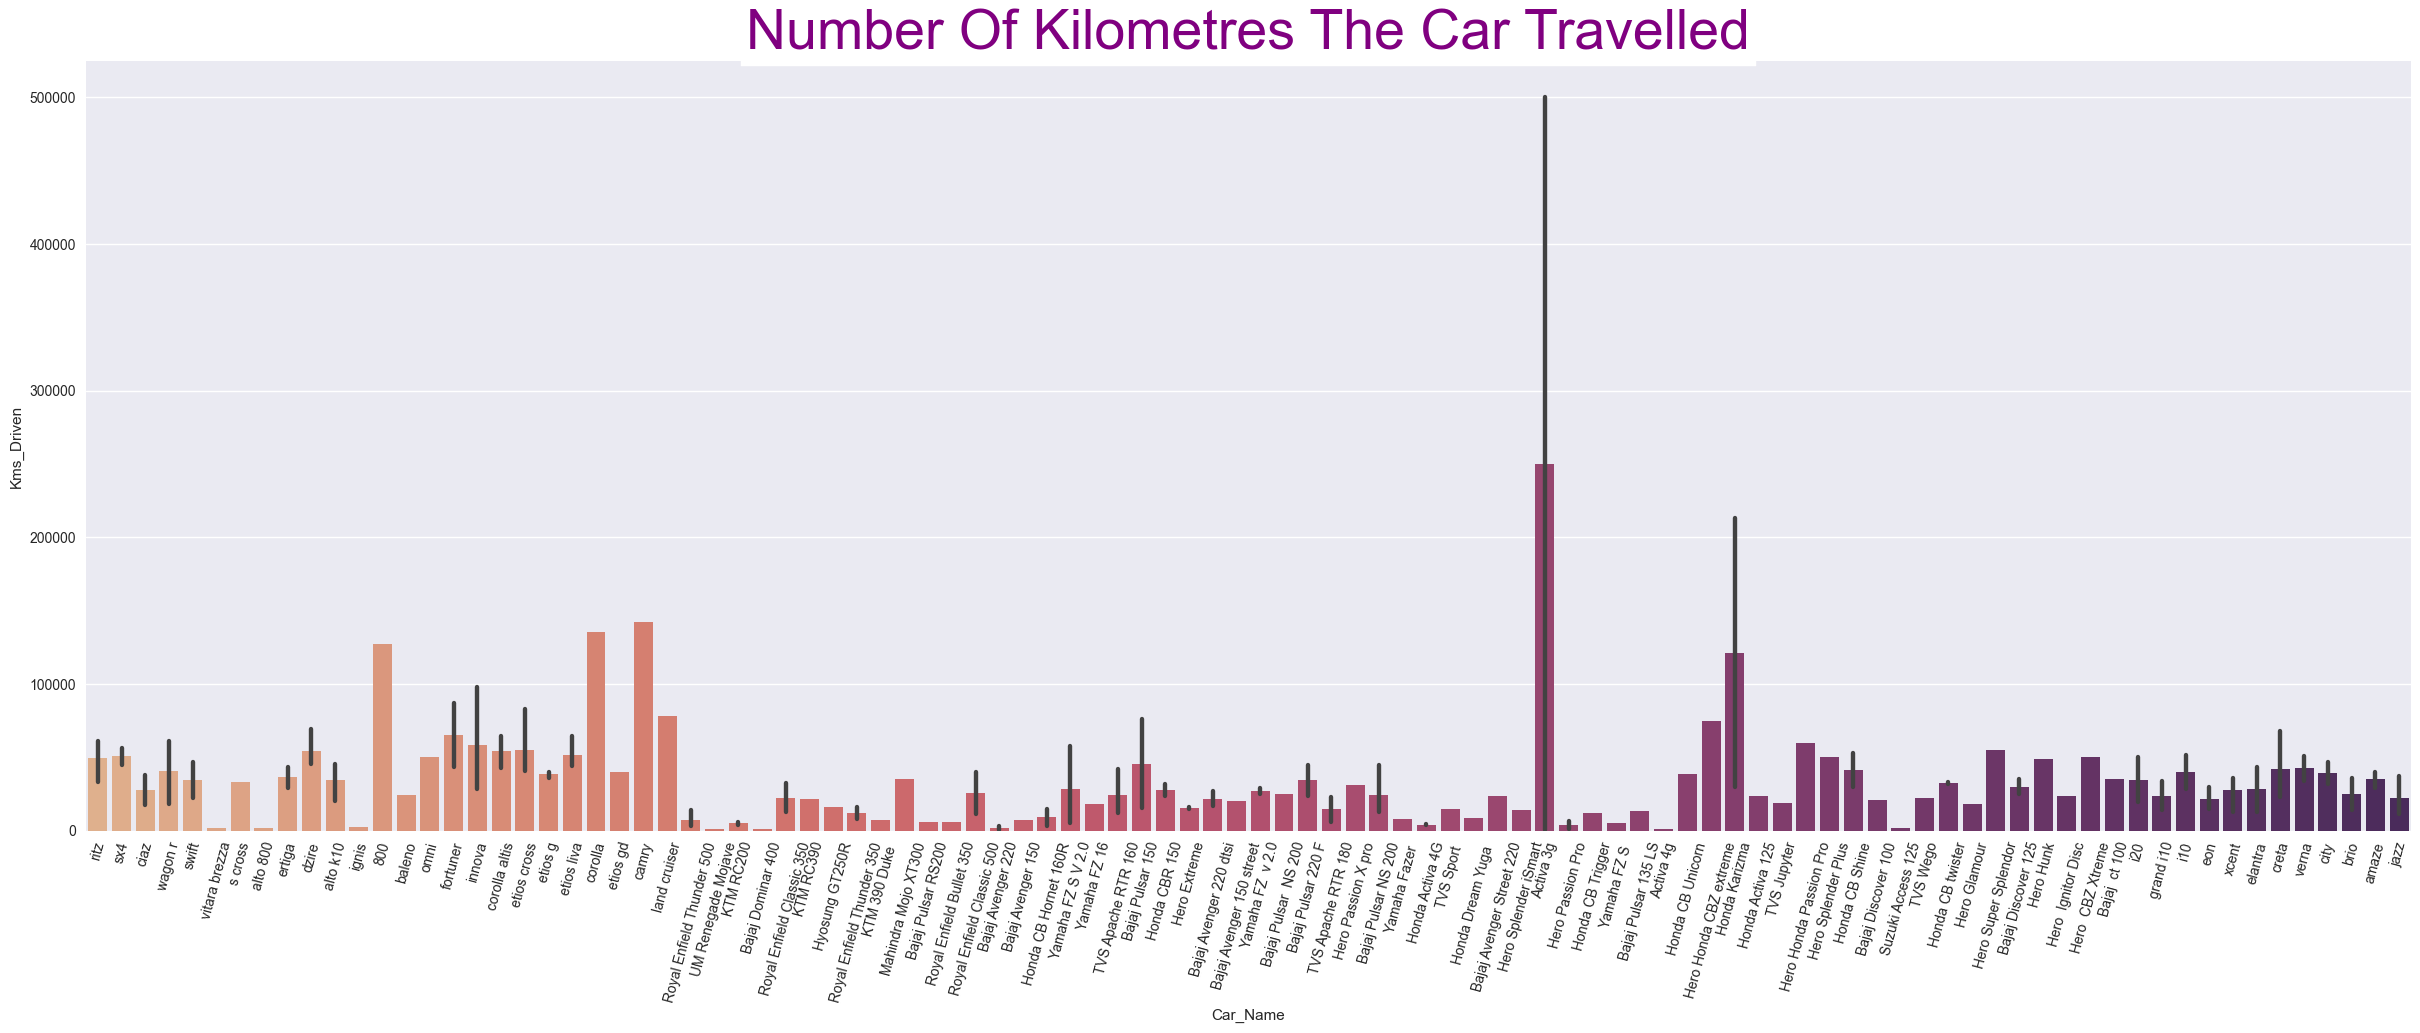

In [17]:
plt.figure(figsize=(30,10))
chart=sns.barplot(x='Car_Name',y='Kms_Driven',data=df,palette='flare')
chart.set_xticklabels(chart.get_xticklabels(),rotation=75)
plt.title("Number Of Kilometres The Car Travelled",
          fontsize='40',
          backgroundcolor='white',
          color='purple');

#plotting a countplot of Seller Types

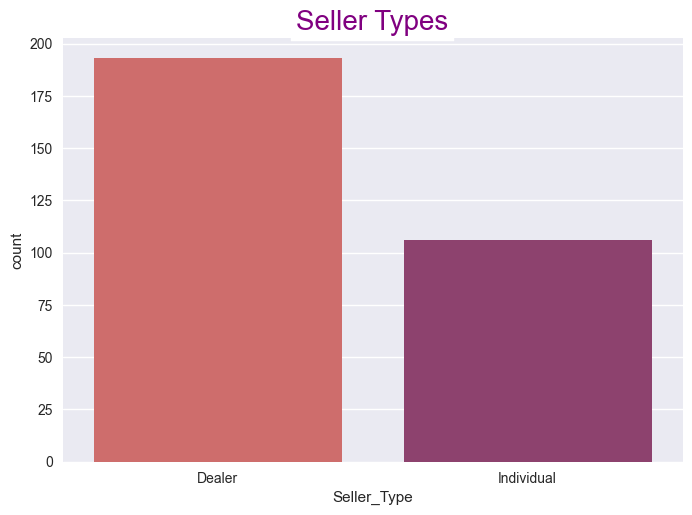

In [18]:
sns.countplot(x='Seller_Type',data=df,palette='flare')
plt.title("Seller Types",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

Plotting a countplot of Transmission Types
palette = the range of colours used

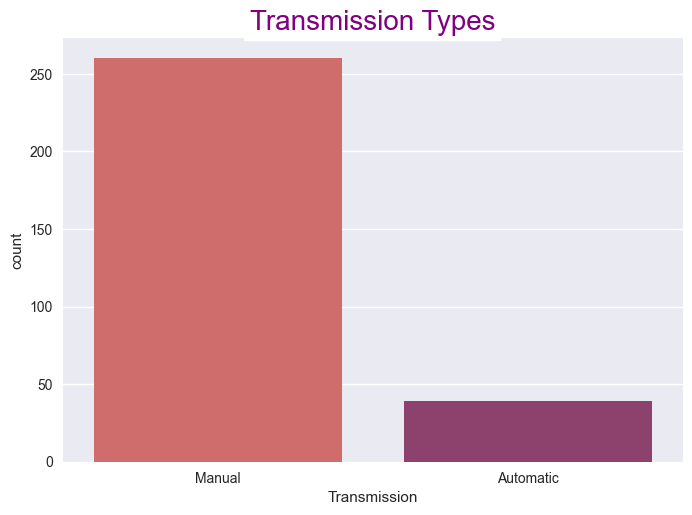

In [19]:
sns.countplot(x='Transmission',data=df,palette='flare')
plt.title("Transmission Types",fontsize='20',backgroundcolor='white',color='purple');

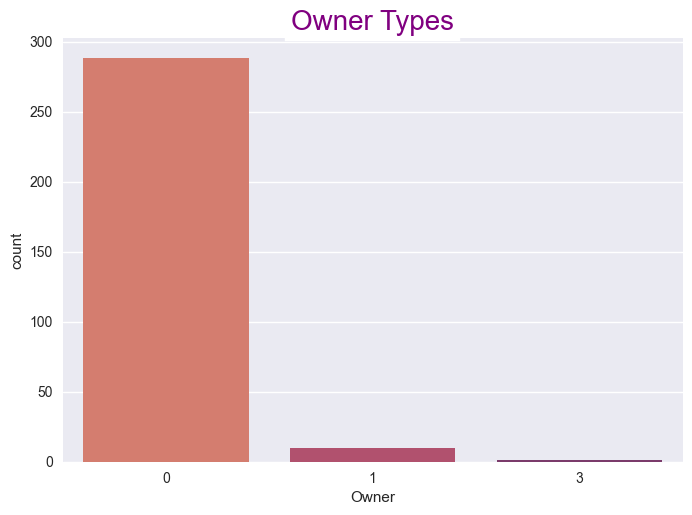

In [20]:
#Plotting a count plot of owner Types
sns.countplot(x='Owner',data=df,palette='flare')
plt.title("Owner Types",fontsize='20',backgroundcolor='white',color='purple');

0    288
1     10
3      1
Name: Owner, dtype: int64


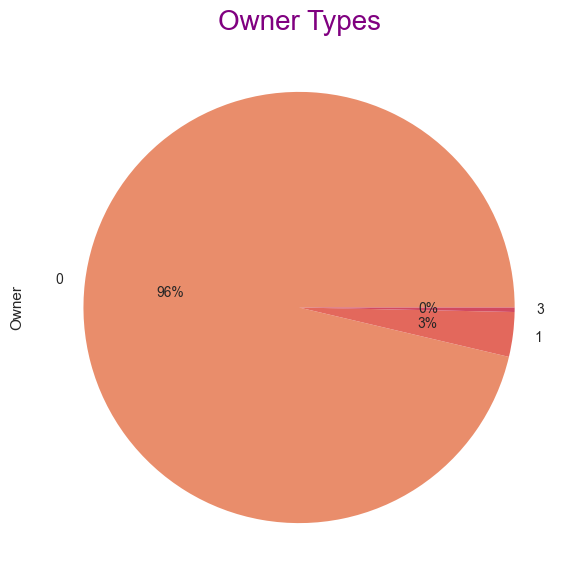

In [21]:
#plotting a pie-chart of Owner Types
palette_color = sns.color_palette('flare')
print(df['Owner'].value_counts())
df['Owner'].value_counts().plot(kind='pie',autopct
='%1.f%%',colors=palette_color,figsize=(7,7));
plt.title("Owner Types",fontsize='20',backgroundcolor='white',color='purple');

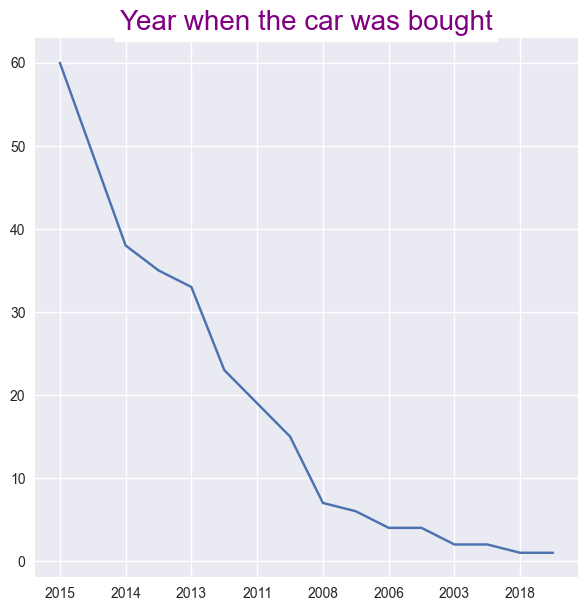

In [22]:
#plotting a line graph of the year when the car was bought.
df['Year'].value_counts().plot(kind='line',figsize=(7,7));
plt.title("Year when the car was bought",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

The number of Cars bought decreases over time.

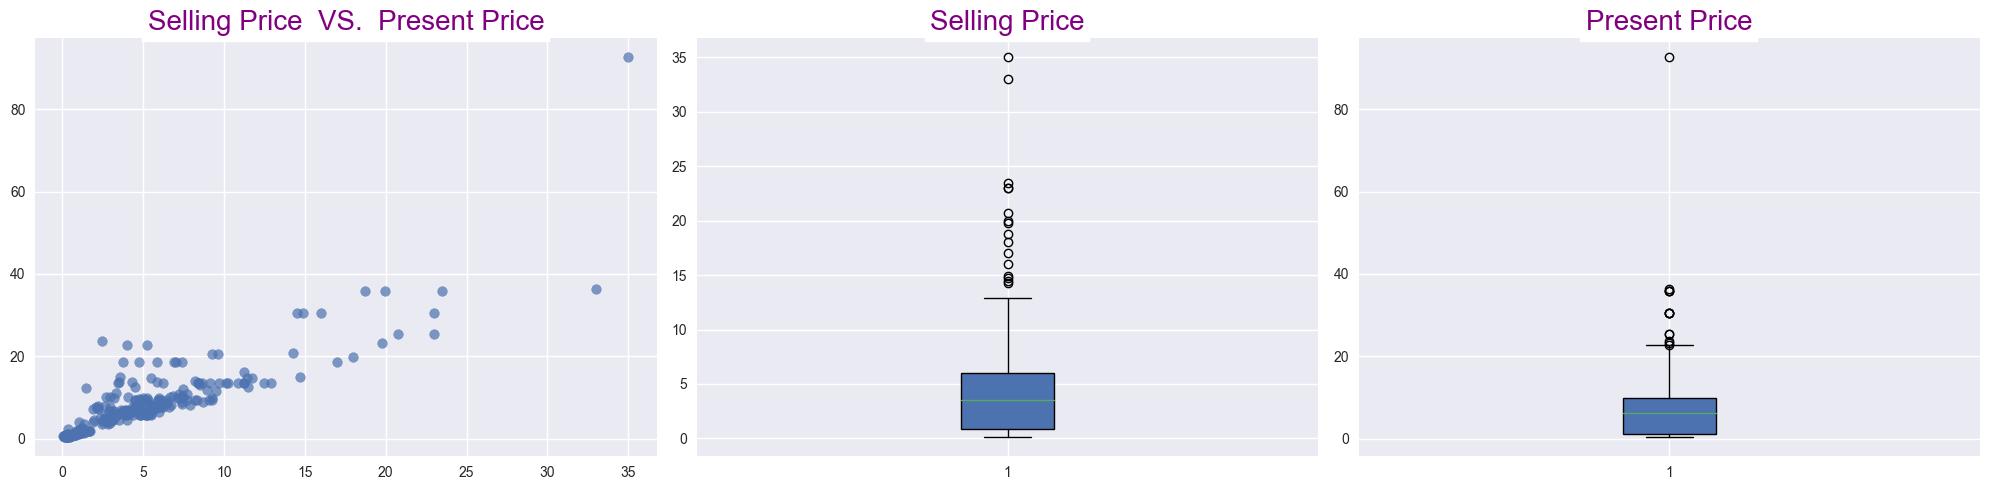

In [26]:
#plotting a scatterplot of Selling price against Present price. Also plotting
#the boxplots of selling price and present price
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax[0].scatter(x=df['Selling_Price'],y=df['Present_Price'],alpha=0.7)
ax[0].set_title("Selling Price  VS.  Present Price",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

ax[1].boxplot(df['Selling_Price'],patch_artist=True)
ax[1].set_title("Selling Price",
          fontsize='20',
          backgroundcolor='white',
          color='purple')

ax[2].boxplot(df['Present_Price'],patch_artist=True)
ax[2].set_title("Present Price",
          fontsize='20',
          backgroundcolor='white',
          color='purple')
plt.tight_layout();

There are positive correlations betwn the selling price and the present price.
There are two outliers in the graphs which should be dropped.

In [27]:
df.drop(df[df['Selling_Price']>30].index,inplace=True)

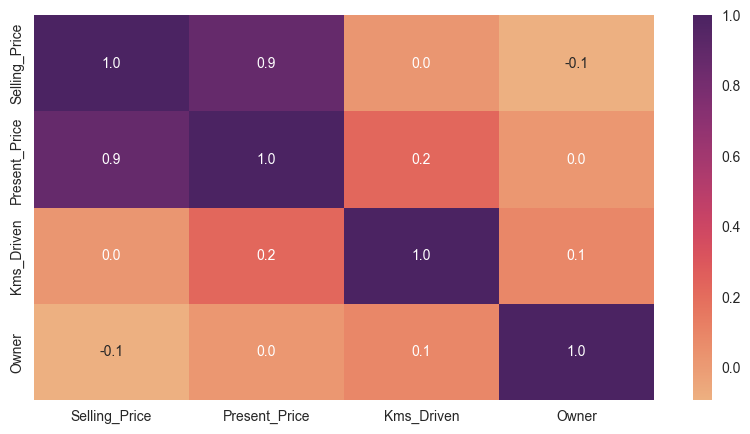

In [28]:
#Checking correlations between features
plt.figure(figsize=(10,5))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
            vmax=1,
            cmap='flare',
            annot=True,
            fmt='.1f',
            linecolor='white',
            cbar=True);

Modelling Data

In [30]:
#converting columns that have object data to numeric
list=['Car_Name','Year','Fuel_Type','Seller_Type','Transmission']
le=LabelEncoder()
for column in list:
    df[column]=le.fit_transform(df[column])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,89,11,3.35,5.59,27000,2,0,1,0
1,92,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,95,8,2.85,4.15,5200,2,0,1,0
4,91,11,4.60,6.87,42450,1,0,1,0


In [31]:
#forming a model
X=df.drop(columns=['Present_Price'])
y=df['Present_Price']
X.shape,y.shape

((297, 8), (297,))

We need to scale our data because it has columns that have big and small values and it will affect the algorithm.

In [32]:
X=StandardScaler().fit_transform(X)
y=y.array.reshape(-1, 1)
y=StandardScaler().fit_transform(y)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((207, 8), (90, 8), (207, 1), (90, 1))

Performing Linear Regression.

In [47]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print('train accuracy: ',np.round(LR.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(LR.score(x_test,y_test),3)*100,'% \n')

train accuracy:  86.3 % 

test accuracy:  85.1 % 



In [48]:
LR_y_predict=LR.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,LR_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,LR_y_predict),' \n')

mean absolute error:  0.29255174815986473  

median absolute error:  0.18717965872480613  



The Stochastic Gradient Descent Regression

In [49]:
SGDLR=SGDRegressor()
SGDLR.fit(x_train,y_train)
print('train accuracy: ',np.round(SGDLR.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(SGDLR.score(x_test,y_test),3)*100,'% \n')

train accuracy:  85.8 % 

test accuracy:  84.39999999999999 % 



In [50]:
SGD_y_predict=SGDLR.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,SGD_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,SGD_y_predict),' \n')

mean absolute error:  0.29447524817454884  

median absolute error:  0.1776244881826511  



Random Forest Regressor


In [51]:
RF=RandomForestRegressor(random_state=12)
RF.fit(x_train,y_train)
print('train accuracy: ',np.round(RF.score(x_train,y_train),3)*100,'% \n')
print('test accuracy: ',np.round(RF.score(x_test,y_test),3)*100,'% \n')

train accuracy:  98.8 % 

test accuracy:  95.0 % 



In [52]:
RF_y_predict=RF.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test,RF_y_predict),' \n')
print('median absolute error: ',median_absolute_error(y_test,RF_y_predict),' \n')

mean absolute error:  0.1331826933394669  

median absolute error:  0.054896337555727835  

